In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter

In [4]:
dataLO = pd.read_csv('data/Sadao/light_off.txt', delimiter = ' ')
data = pd.read_csv('data/Sadao/110nm_2.txt', delimiter = ' ')
dataPBS = pd.read_csv('data/Sadao/PBS.txt', delimiter = ' ')

In [5]:
data = np.array(data)[:]
dataLO = np.array(dataLO)[:]
dataPBS = np.array(dataPBS)[:]
dataNpSmooth = gaussian_filter(data[:,2],3)

ag = np.argmax(dataNpSmooth[:])

In [7]:
dataPBS.shape

(19999999, 3)

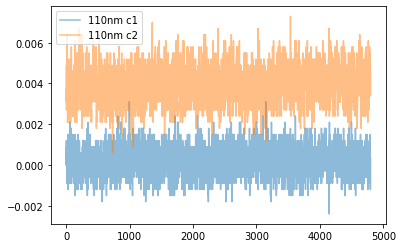

In [17]:
# scattered light
#plt.plot(dataPBS[200:20000,1], label = 'PBS c1', alpha = 0.5)
#plt.plot(dataLO[200:50000,1], label = 'LO c1', alpha = 0.5)
plt.plot(data[200:5000,1], label = '110nm c1', alpha = 0.5)
#plt.legend()
#plt.show()

# fluorescence
#plt.plot(dataPBS[200:5000,2], label = 'PBS c2', alpha = 0.5)
#plt.plot(dataLO[200:5000,2], label = 'LO c2', alpha = 0.5)
plt.plot(data[200:5000,2], label = '110nm c2', alpha = 0.5)
plt.legend()
plt.show()

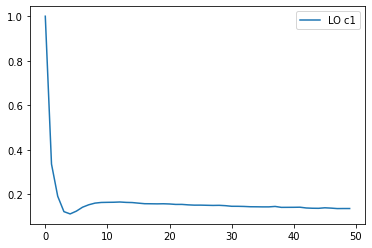

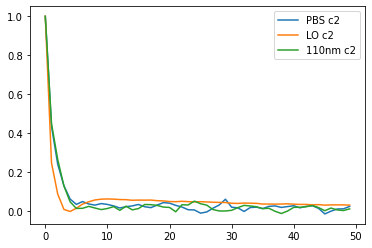

In [68]:


def ac(a):
    a = a-a.mean()
    results = []
    for i in range(50):
       # print(i)
        if i == 0:
            covar = np.mean(a**2)
        else:
            covar = np.mean(a[...,i:]*a[...,:-i])
        results.append(covar)
    results = np.array(results)
    return results/(a**2).mean()


# acDat = ac(dataPBS[200:5000,1])
# plt.plot(acDat, label = 'PBS c1')

acDat = ac(dataLO[:500000,1])
plt.plot(acDat, label = 'LO c1')

# acDat = ac(data[200:5000,1])
# plt.plot(acDat, label = '110nm c1')

# acDat = ac(dataLO[200:5000,2])
# plt.plot(acDat, label = 'LO c2')

acDat = ac(np.random.randn(500000))
#plt.plot(acDat,label = 'random', c= 'k')

plt.legend()
plt.show()


acDat = ac(dataPBS[200:5000,2])
plt.plot(acDat, label = 'PBS c2')

acDat = ac(dataLO[:500000,2])
plt.plot(acDat, label = 'LO c2')

acDat = ac(data[200:5000,2])
plt.plot(acDat, label = '110nm c2')

acDat = ac(np.random.randn(500000))
#plt.plot(acDat,label = 'random', c= 'k')


plt.legend()
plt.show()




In [6]:
from scipy.signal import argrelextrema
maxPos = argrelextrema(dataNpSmooth, np.greater)[0]
results = []
for i in maxPos:
    if dataNpSmooth[i] > 0.01:
        results.append(i)
maxPos = results

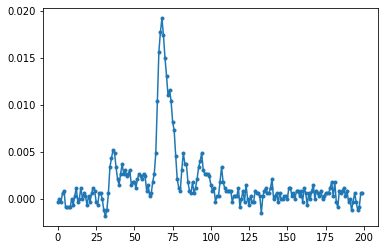

In [19]:
plt.plot(data[:200,1], marker = '.')

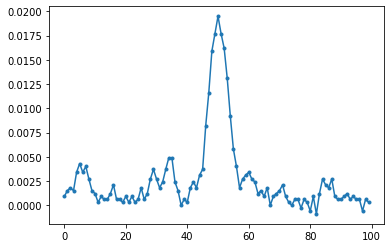

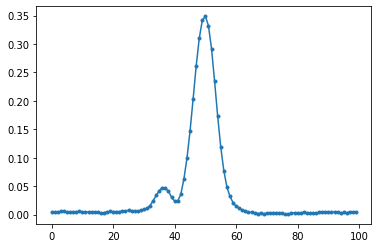

In [13]:
ag = maxPos[6]
plt.plot(data[ag-50:ag+50,1], marker = '.')
plt.show()

plt.plot(data[ag-50:ag+50,2], marker = '.')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (300,) and (0,)

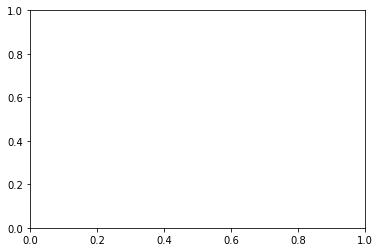

In [21]:
agA = maxPos[8]
agB = maxPos[1]
plt.plot(data[agA-150:agA+150,1],data[agB-150:agB+150,1], marker = '.', lw = 0)

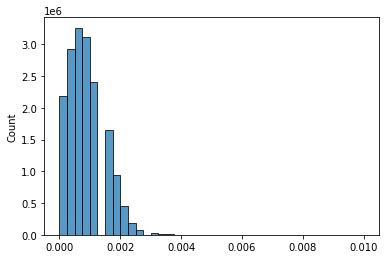

In [9]:
sns.histplot(dataNp[:,1],binrange=(0,0.01), bins = 40)
plt.show()

In [11]:
data_cropped = []
for arg in maxPos:
    if data[arg-200:arg+200,1].shape[0] == 400:
        if np.max(data[arg-200:arg+200,1])<=0.25:
            data_cropped.append(data[arg-500:arg+200,1])
        
data_cropped = np.array(data_cropped)

In [12]:
import tifffile
tifffile.imsave('data/Sadao/observation_cropped2.tif', data_cropped)

/tmp/ipykernel_3143750/3503910688.py:2: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave('data/Sadao/observation_cropped2.tif', data_cropped)


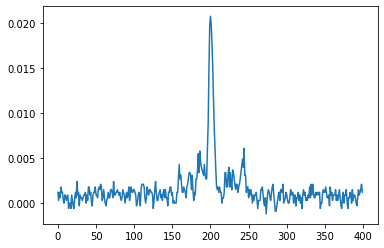

In [22]:
plt.plot(data_cropped[100])

In [19]:
data_cropped.shape

(1149, 400)